# Auto Ownership- Survey Comparison

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import os, sys
%matplotlib inline

os.chdir('..\..\..\..')

from input_configuration import base_year

from IPython.display import display, HTML

if (sys.version_info < (3, 0)):
    HTML('''<script>
    code_show=true; 
    function code_toggle() {
     if (code_show){
     $('div.input').hide();
     } else {
     $('div.input').show();
     }
     code_show = !code_show
    } 
    $( document ).ready(code_toggle);
    </script>
    <form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')



In [2]:
working_dir = r'outputs/agg/dash'
pd.options.display.float_format = '{:0,.0f}'.format
format_percent = "{:,.2%}".format

In [3]:
def load_data(fname):
    """ open and join model and survey data """

    df_model = pd.read_csv(os.path.join(working_dir,fname+'.csv'))
    df_model['source'] = 'model'
    df_survey = pd.read_csv(os.path.join(working_dir,'survey',fname+'.csv'))
    df_survey['source'] = 'survey'
    df = df_model.append(df_survey)

    return df

<AxesSubplot:title={'center':'Region'}, ylabel='hhvehs'>

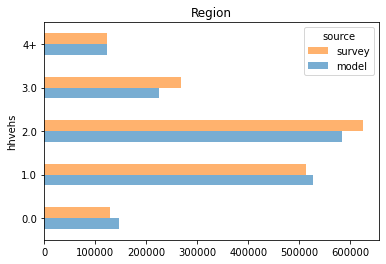

In [4]:
df = load_data('auto_ownership')
df.loc[df['hhvehs'] >= 4, 'hhvehs'] = '4+'
df = df.pivot_table(index='hhvehs', columns='source', aggfunc='sum', values='hhexpfac')
df.plot(kind='barh', title='Region', legend='reverse', alpha=0.6)

In [5]:
df['est/observed'] = (df['model'] / df['survey']) * 100
df

source,model,survey,est/observed
hhvehs,,,
0.0,"146,443","129,688",113
1.0,"526,526","512,273",103
2.0,"583,552","624,897",93
3.0,"225,301","267,391",84
4+,"123,441","122,263",101


## By Income

In [6]:
df = load_data('auto_ownership')

# Define income groups
inc_bin=[-1,20000,40000,60000,75000,9999999999999]
inc_bin_labels = ['0-$20k','$20-40k','$40-60k','$60-75k','>$75k']
df['income_bin'] = pd.cut(df['hhincome_thousands'], bins=inc_bin, labels=inc_bin_labels)

df.loc[df['hhvehs'] >= 3, 'hhvehs'] = '3+'

pd.pivot_table(df, index=['hhvehs','source'], columns='income_bin', values='hhexpfac', aggfunc='sum')

income_bin     0-$20k  $20-40k  $40-60k  $60-75k   >$75k
hhvehs source                                           
0.0    model   55,710   32,649   18,967    6,270  32,841
       survey  64,043   27,901   17,279      nan  20,465
1.0    model  114,600  108,986   86,579   32,177 184,083
       survey 138,715  102,527  110,953      nan 160,079
2.0    model   33,247   52,232   75,941   38,451 383,667
       survey  90,579   85,436   77,247      nan 371,635
3+     model    9,163   18,137   31,285   16,926 273,227
       survey  55,980   20,591   36,424      nan 276,658

In [7]:
pd.options.display.float_format = "{:,.2%}".format
_df_model = pd.pivot_table(df[df['source'] == 'model'], index='hhvehs', columns='hh_county', values='hhexpfac', aggfunc='sum')
_df_model = _df_model/_df_model.sum()
_df_survey = pd.pivot_table(df[df['source'] == 'survey'], index='hhvehs', columns='hh_county', values='hhexpfac', aggfunc='sum')
_df_survey = _df_survey/_df_survey.sum()

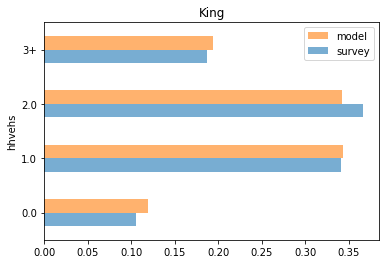

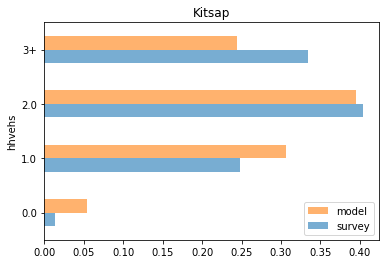

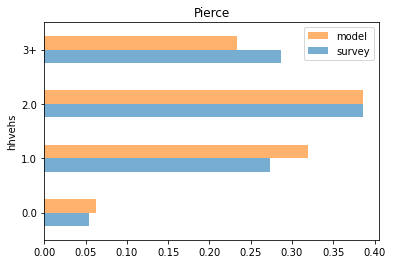

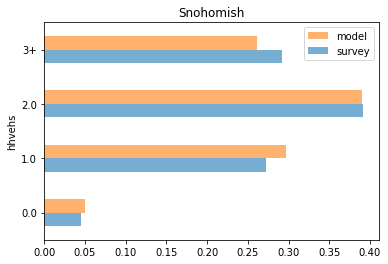

In [8]:
for county in df['hh_county'].unique():
    _df = pd.DataFrame([_df_survey[county],_df_model[county]]).T
    _df.columns = ['survey','model']
    _df.plot(kind='barh', title=county, legend='reverse', alpha=0.6)